# Basic from Scratch

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from utils.helper import visualize_noise
from utils.model import BasicUNet, train_model, make_predictions, sample_images

In [2]:
batch_size = 8
epochs = 10
lr = 4e-4

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


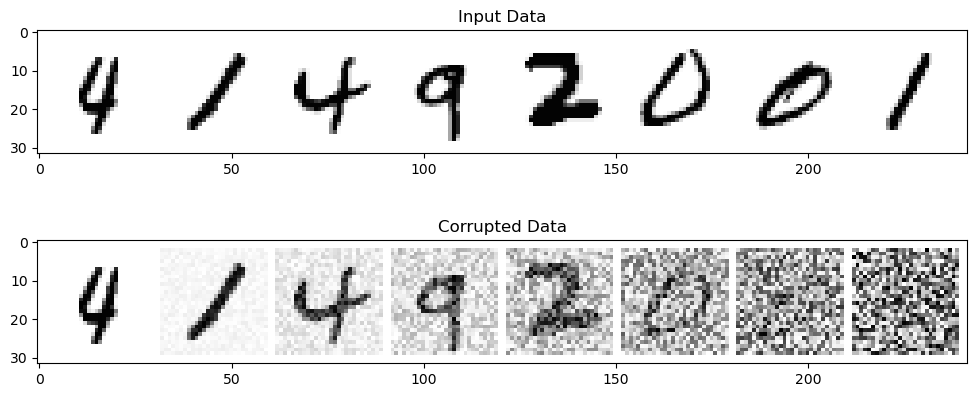

In [3]:
dataset = torchvision.datasets.MNIST(root="mnist/", train=True, download=True, transform=torchvision.transforms.ToTensor())
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

x, y = next(iter(train_loader))
visualize_noise(x)

Finished Epoch 1 --- Average Loss: 0.020250
Finished Epoch 2 --- Average Loss: 0.016989
Finished Epoch 3 --- Average Loss: 0.015941
Finished Epoch 4 --- Average Loss: 0.014756
Finished Epoch 5 --- Average Loss: 0.014186
Finished Epoch 6 --- Average Loss: 0.013893
Finished Epoch 7 --- Average Loss: 0.013676
Finished Epoch 8 --- Average Loss: 0.013273
Finished Epoch 9 --- Average Loss: 0.013216
Finished Epoch 10 --- Average Loss: 0.013079


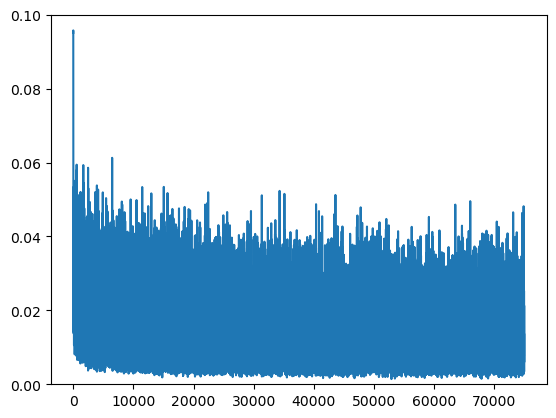

In [4]:
net = BasicUNet().to(device)
optim = torch.optim.Adam(net.parameters(), lr=lr)
train_model(net, train_loader, optim, epochs, device)

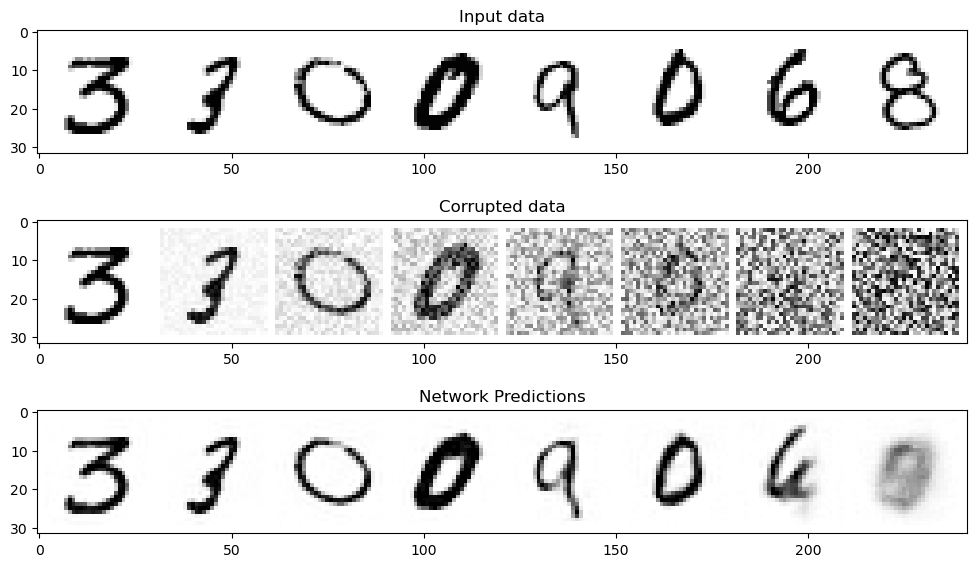

In [5]:
make_predictions(net, train_loader, device)

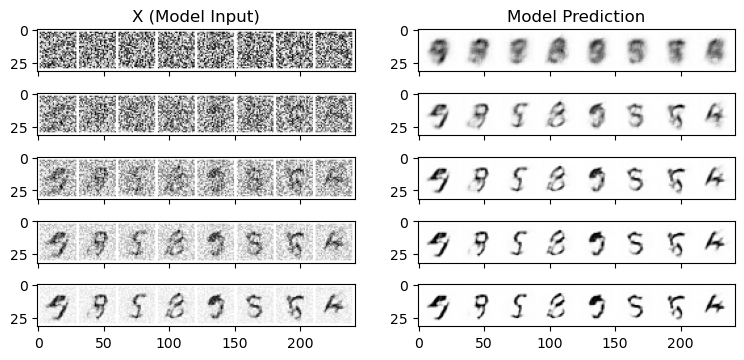

In [6]:
sample_images(net, device)

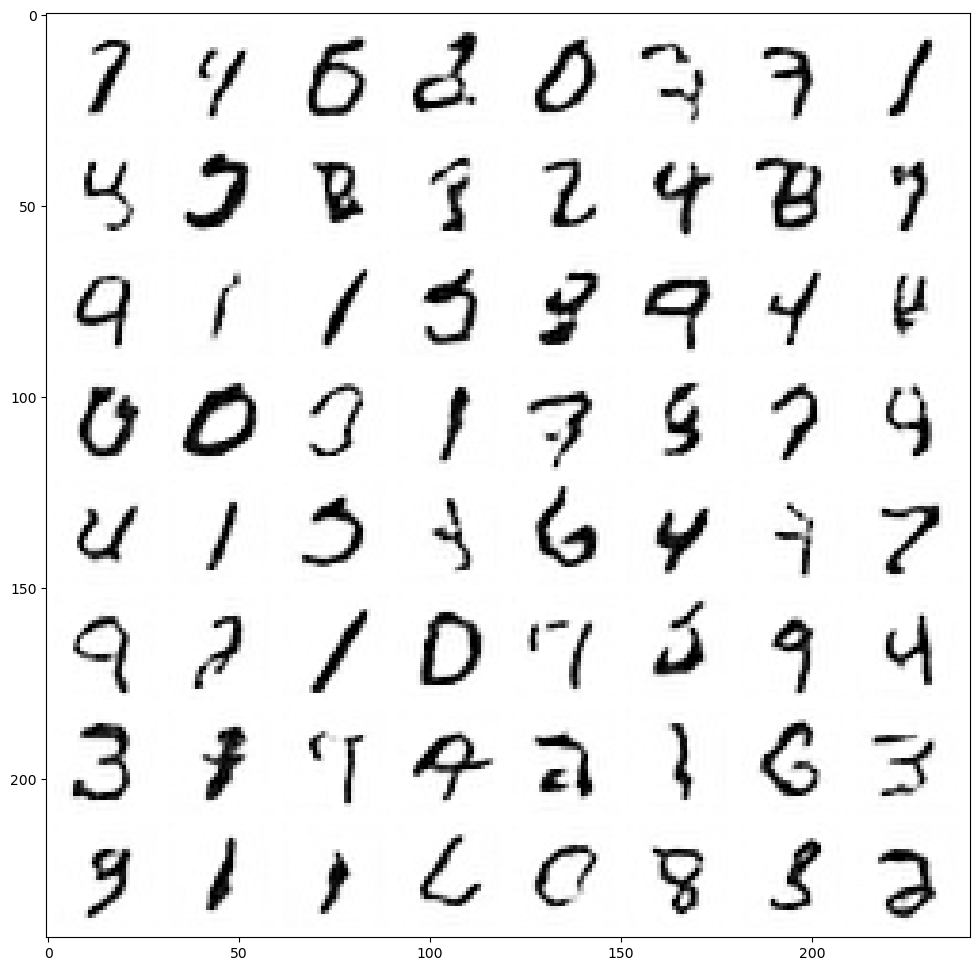

In [7]:
n_steps = 40
x = torch.rand(64, 1, 28, 28).to(device)
for i in range(n_steps):
  noise_amount = torch.ones((x.shape[0], )).to(device) * (1-(i/n_steps))
  with torch.no_grad():
    pred = net(x)
  mix_factor = 1/(n_steps - i)
  x = x*(1-mix_factor) + pred*mix_factor
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(torchvision.utils.make_grid(x.detach().cpu(), nrow=8)[0].clip(0, 1), cmap='Greys')